<p style="font-size:200%; font-weight:bold"> Token Death </p>

- Author: Yichen Luo
- Date: 20221010

In [1]:
import pandas as pd
import threading
import requests
import time
import os
import datetime
import re
import string
import random
import numpy as np
import seaborn as sns;sns.set_theme(color_codes=True)
import warnings
from web3 import Web3
from hexbytes import HexBytes

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from IPython.core.interactiveshell import InteractiveShell
pd.set_option('max_colwidth', 100)
pd.set_option('display.max_columns', 100)
warnings.filterwarnings("ignore")


RD = '/home/team_defi/02_rdata/'
WD = '/home/team_defi/03_wdata/'
RES = '/home/team_defi/04_result/'
InteractiveShell.ast_node_interactivity = 'all'

# Death Definition

## First Close Price as Initial Price

### Insider Panel

In [24]:
df = pd.read_csv(f'{WD}token_ret_new/lst/panel_insider.csv')
df.sort_values(['date'], ascending=True, inplace=True)

df.dropna(subset=['priceUSD'], inplace=True)
df = df.loc[df['priceUSD'] != 0]

df.sample(1)
csv = df.loc[(df['contractAddress'] == '0xc7f2723b64d88f4d14f0beb2e9ffce78795bbcc6')&(df['chain'] == 'ethereum')]
df.loc[(df['contractAddress'] == '0xc7f2723b64d88f4d14f0beb2e9ffce78795bbcc6')&(df['chain'] == 'ethereum')].sort_values('date', ascending=True).head(1)['priceUSD'].values[0]

,date,contractAddress,chain,ret_-5,ret_-4,ret_-3,ret_-2,ret_-1,ret_0,ret_1,ret_2,ret_3,ret_4,ret_5,priceUSD,panel,insider_trading,insider_buy,insider_sell
119808,2022-02-22,0x4c25bdf026ea05f32713f00f73ca55857fbf6342,ethereum,-0.098876,-0.037556,-0.032872,NaN,NaN,-0.066179,NaN,NaN,NaN,NaN,NaN,0.546628,layer_one,False,False,False


3.003e-13

In [27]:
df = pd.read_csv(f'{WD}token_ret_new/lst/panel_insider.csv')
df['initial price'] = 0
df.dropna(subset=['priceUSD'], inplace=True)
df = df.loc[df['priceUSD'] != 0]

total = df.drop_duplicates(['contractAddress', 'chain']).shape[0]
done = 0

for idx, row in df.drop_duplicates(['contractAddress', 'chain']).iterrows():
    done += 1
    contractAddress = row['contractAddress']
    chain = row['chain']
    
    ip = df.loc[(df['contractAddress'] == contractAddress)&(df['chain'] == chain)].sort_values('date', ascending=True).head(1)['priceUSD'].values[0]
    df.loc[(df['contractAddress'] == contractAddress)&(df['chain'] == chain), 'initial price'] = ip
    print(f'{done}/{total}')

1/4416
2/4416
3/4416
4/4416
5/4416
6/4416
7/4416
8/4416
9/4416
10/4416
11/4416
12/4416
13/4416
14/4416
15/4416
16/4416
17/4416
18/4416
19/4416
20/4416
21/4416
22/4416
23/4416
24/4416
25/4416
26/4416
27/4416
28/4416
29/4416
30/4416
31/4416
32/4416
33/4416
34/4416
35/4416
36/4416
37/4416
38/4416
39/4416
40/4416
41/4416
42/4416
43/4416
44/4416
45/4416
46/4416
47/4416
48/4416
49/4416
50/4416
51/4416
52/4416
53/4416
54/4416
55/4416
56/4416
57/4416
58/4416
59/4416
60/4416
61/4416
62/4416
63/4416
64/4416
65/4416
66/4416
67/4416
68/4416
69/4416
70/4416
71/4416
72/4416
73/4416
74/4416
75/4416
76/4416
77/4416
78/4416
79/4416
80/4416
81/4416
82/4416
83/4416
84/4416
85/4416
86/4416
87/4416
88/4416
89/4416
90/4416
91/4416
92/4416
93/4416
94/4416
95/4416
96/4416
97/4416
98/4416
99/4416
100/4416
101/4416
102/4416
103/4416
104/4416
105/4416
106/4416
107/4416
108/4416
109/4416
110/4416
111/4416
112/4416
113/4416
114/4416
115/4416
116/4416
117/4416
118/4416
119/4416
120/4416
121/4416
122/4416
123/4416
1

In [33]:
df.to_csv(f'{WD}/dead/list/panel_insider.csv', index=False)

### All Projects

In [34]:
df = pd.read_csv(f'{WD}crash/list/panel.csv')
df['initial price'] = 0
df.dropna(subset=['priceUSD'], inplace=True)
df = df.loc[df['priceUSD'] != 0]

total = df.drop_duplicates(['contractAddress', 'chain']).shape[0]
done = 0

for idx, row in df.drop_duplicates(['contractAddress', 'chain']).iterrows():
    done += 1
    contractAddress = row['contractAddress']
    chain = row['chain']
    
    ip = df.loc[(df['contractAddress'] == contractAddress)&(df['chain'] == chain)].sort_values('date', ascending=True).head(1)['priceUSD'].values[0]
    df.loc[(df['contractAddress'] == contractAddress)&(df['chain'] == chain), 'initial price'] = ip
    print(f'{done}/{total}')

1/9994
2/9994
3/9994
4/9994
5/9994
6/9994
7/9994
8/9994
9/9994
10/9994
11/9994
12/9994
13/9994
14/9994
15/9994
16/9994
17/9994
18/9994
19/9994
20/9994
21/9994
22/9994
23/9994
24/9994
25/9994
26/9994
27/9994
28/9994
29/9994
30/9994
31/9994
32/9994
33/9994
34/9994
35/9994
36/9994
37/9994
38/9994
39/9994
40/9994
41/9994
42/9994
43/9994
44/9994
45/9994
46/9994
47/9994
48/9994
49/9994
50/9994
51/9994
52/9994
53/9994
54/9994
55/9994
56/9994
57/9994
58/9994
59/9994
60/9994
61/9994
62/9994
63/9994
64/9994
65/9994
66/9994
67/9994
68/9994
69/9994
70/9994
71/9994
72/9994
73/9994
74/9994
75/9994
76/9994
77/9994
78/9994
79/9994
80/9994
81/9994
82/9994
83/9994
84/9994
85/9994
86/9994
87/9994
88/9994
89/9994
90/9994
91/9994
92/9994
93/9994
94/9994
95/9994
96/9994
97/9994
98/9994
99/9994
100/9994
101/9994
102/9994
103/9994
104/9994
105/9994
106/9994
107/9994
108/9994
109/9994
110/9994
111/9994
112/9994
113/9994
114/9994
115/9994
116/9994
117/9994
118/9994
119/9994
120/9994
121/9994
122/9994
123/9994
1

In [35]:
df['dead'] = df['priceUSD'] < (df['initial price'] * 0.05)
df.drop_duplicates(['contractAddress', 'chain']).shape[0]
df.loc[df['dead'] == True].drop_duplicates(['contractAddress', 'chain']).shape[0]

9994

1600

In [36]:
df.to_csv(f'{WD}/dead/list/panel_all.csv', index=False)

# First Transaction Price as Initial Price

# Token Death

## Insider Trading

'root'

214

534

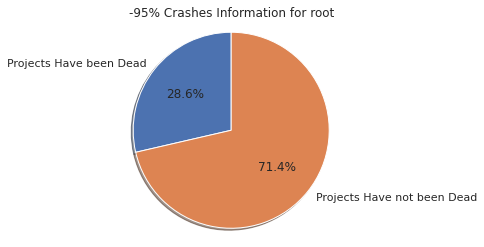

'layer_one'

77

89

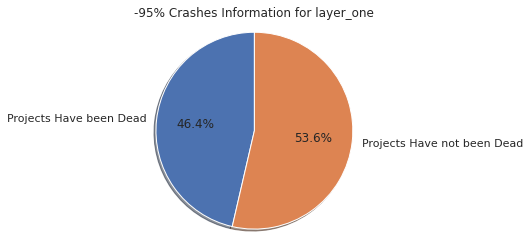

'whale_new'

528

3386

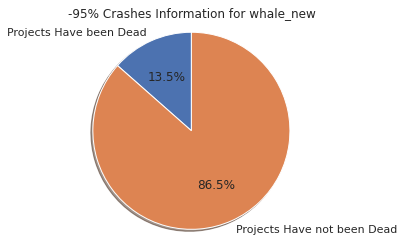

<AxesSubplot:xlabel='date'>

,date,contractAddress,chain,ret_-5,ret_-4,ret_-3,ret_-2,ret_-1,ret_0,ret_1,ret_2,ret_3,ret_4,ret_5,priceUSD,panel,insider_trading,insider_buy,insider_sell,initial price,dead
317693,2021-11-18,0x347E430b7Cd1235E216be58ffA13394e5009E6e2,binance,NaN,NaN,NaN,NaN,NaN,NaN,0.116874,0.051242,0.466430,0.224037,0.151664,0.484100,whale_new,False,False,False,0.4841,False
317694,2021-11-19,0x347E430b7Cd1235E216be58ffA13394e5009E6e2,binance,NaN,NaN,NaN,NaN,NaN,0.116874,0.051242,0.466430,0.224037,0.151664,-0.211289,0.544118,whale_new,False,False,False,0.4841,False
317695,2021-11-20,0x347E430b7Cd1235E216be58ffA13394e5009E6e2,binance,NaN,NaN,NaN,NaN,0.116874,0.051242,0.466430,0.224037,0.151664,-0.211289,0.133443,0.572727,whale_new,False,False,False,0.4841,False
317696,2021-11-21,0x347E430b7Cd1235E216be58ffA13394e5009E6e2,binance,NaN,NaN,NaN,0.116874,0.051242,0.466430,0.224037,0.151664,-0.211289,0.133443,-0.141812,0.913094,whale_new,False,False,False,0.4841,False
317697,2021-11-22,0x347E430b7Cd1235E216be58ffA13394e5009E6e2,binance,NaN,NaN,0.116874,0.051242,0.466430,0.224037,0.151664,-0.211289,0.133443,-0.141812,0.018988,1.142388,whale_new,False,False,False,0.4841,False
317698,2021-11-23,0x347E430b7Cd1235E216be58ffA13394e5009E6e2,binance,NaN,0.116874,0.051242,0.466430,0.224037,0.151664,-0.211289,0.133443,-0.141812,0.018988,0.094286,1.329476,whale_new,False,False,False,0.4841,False
317699,2021-11-24,0x347E430b7Cd1235E216be58ffA13394e5009E6e2,binance,0.116874,0.051242,0.466430,0.224037,0.151664,-0.211289,0.133443,-0.141812,0.018988,0.094286,-0.007685,1.076263,whale_new,False,False,False,0.4841,False
317700,2021-11-25,0x347E430b7Cd1235E216be58ffA13394e5009E6e2,binance,0.051242,0.466430,0.224037,0.151664,-0.211289,0.133443,-0.141812,0.018988,0.094286,-0.007685,-0.129425,1.229906,whale_new,False,False,False,0.4841,False
317701,2021-11-26,0x347E430b7Cd1235E216be58ffA13394e5009E6e2,binance,0.466430,0.224037,0.151664,-0.211289,0.133443,-0.141812,0.018988,0.094286,-0.007685,-0.129425,-0.104762,1.067293,whale_new,False,False,False,0.4841,False
317702,2021-11-27,0x347E430b7Cd1235E216be58ffA13394e5009E6e2,binance,0.224037,0.151664,-0.211289,0.133443,-0.141812,0.018988,0.094286,-0.007685,-0.129425,-0.104762,-0.182673,1.087752,whale_new,False,False,False,0.4841,False


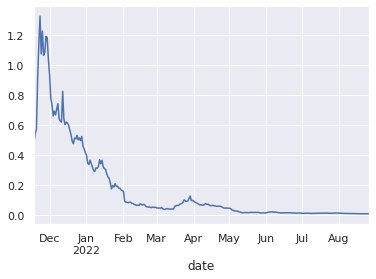

In [32]:
df['dead'] = df['priceUSD'] < (df['initial price'] * 0.05)
accs = ['root', 'layer_one', 'whale_new']
for acc in accs:
    acc
    crash = []
    
    have = df.loc[(df['dead'] == True)&(df['panel']==acc), ['contractAddress','chain']].drop_duplicates().shape[0]
    total = df.loc[df['panel']==acc,['contractAddress','chain']].drop_duplicates().shape[0]
    havenot = total - have
    
    have
    havenot
    
    crash.append(have)
    crash.append(havenot)
    

    labels = 'Projects Have been Dead', 'Projects Have not been Dead'

    fig1, ax1 = plt.subplots()
    _ = ax1.pie(crash, labels=labels, autopct='%1.1f%%',
                shadow=True, startangle=90)
    _ = ax1.set_title(f'-95% Crashes Information for {acc}')
    _ = ax1.axis('equal')

    plt.show()

contractAddress = df.loc[df['dead'] ==True, ['contractAddress']].sample(1)['contractAddress'].values[0]
df['date'] = pd.to_datetime(df['date'])
df.loc[df['contractAddress'] == contractAddress].set_index('date')['priceUSD'].plot()
df.loc[df['contractAddress'] == contractAddress]